In [1]:
import os
import cv2
import mediapipe as mp
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Button, Entry, filedialog, StringVar

In [3]:
# Inicializar MediaPipe Face Mesh

witdth, height = 96,96

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Función para procesar una imagen y obtener las coordenadas cx, cy, cz de los puntos clave del rostro
def procesar_imagen(imagen):
    """
    """
    resultados = face_mesh.process(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    
    if resultados.multi_face_landmarks:
        lm = resultados.multi_face_landmarks
        landmarks = lm[0].landmark
        positions_x = np.array([int(landmark.x*witdth) for landmark in landmarks])
        positions_y = np.array([int(landmark.y*height) for landmark in landmarks])
        df = pd.DataFrame({'cx': positions_x, 'cy': positions_y})
        return df
    else:
        return None

# Función para guardar el CSV y la gráfica
def guardar_csv_y_grafica(carpeta, emocion, contador, df):
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    
    archivo_csv = os.path.join(carpeta, f"{emocion}_{contador}.csv")
    df.to_csv(archivo_csv, index=False)

    # Graficar los puntos cx y cy
    plt.scatter(df['cx'], df['cy'], c='blue', marker='.')
    plt.gca().invert_yaxis()
    plt.axis('equal')
    
    # Guardar la gráfica
    archivo_grafica = os.path.join(carpeta, f"{emocion}_{contador}.png")
    plt.savefig(archivo_grafica)
    plt.close()

# Función para encontrar el número de contador más alto en la carpeta
def obtener_contador_inicial(carpeta_emocion):
    max_contador = 0
    if os.path.exists(carpeta_emocion):
        for nombre_archivo in os.listdir(carpeta_emocion):
            if nombre_archivo.endswith('.csv'):
                numero = int(nombre_archivo.split('_')[1].split('.')[0])
                if numero > max_contador:
                    max_contador = numero
    return max_contador + 1

# Función principal
def etiquetar_imagenes_carpeta():
    emocion = emocion_var.get()
    carpeta_imagenes = carpeta_imagenes_var.get()
    carpeta_guardado = carpeta_guardado_var.get()

    if not os.path.exists(carpeta_imagenes):
        print("La carpeta de imágenes no existe. Intenta de nuevo.")
        return
    
    # Crear o verificar si existe una carpeta para la emoción dentro de la carpeta de guardado
    carpeta_emocion = os.path.join(carpeta_guardado, emocion)
    if not os.path.exists(carpeta_emocion):
        os.makedirs(carpeta_emocion)
    
    # Obtener el contador inicial basándose en los archivos existentes en la carpeta de la emoción
    contador = obtener_contador_inicial(carpeta_emocion)

    for nombre_archivo in os.listdir(carpeta_imagenes):
        ruta_imagen = os.path.join(carpeta_imagenes, nombre_archivo)
        
        if os.path.isfile(ruta_imagen) and nombre_archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
            imagen = cv2.imread(ruta_imagen)
            df = procesar_imagen(imagen)
            if df is not None:
                guardar_csv_y_grafica(carpeta_emocion, emocion, contador, df)
                print(f"Guardado {emocion}_{contador}.csv y {emocion}_{contador}.png en la carpeta {carpeta_emocion}")
                contador += 1
            else:
                print(f"No se detectó una cara en {nombre_archivo}")

# Funciones para la interfaz gráfica
def seleccionar_carpeta_imagenes():
    carpeta = filedialog.askdirectory()
    carpeta_imagenes_var.set(carpeta)

def seleccionar_carpeta_guardado():
    carpeta = filedialog.askdirectory()
    carpeta_guardado_var.set(carpeta)

# Configuración de la interfaz gráfica
root = Tk()
root.title("Procesamiento de Imágenes con Face Mesh")

# Variables de Tkinter
emocion_var = StringVar()
carpeta_imagenes_var = StringVar()
carpeta_guardado_var = StringVar()

# Etiquetas y campos de entrada
Label(root, text="Introduce la emoción (e.g., Feliz, Triste):").grid(row=0, column=0, padx=10, pady=5)
Entry(root, textvariable=emocion_var).grid(row=0, column=1, padx=10, pady=5)

Label(root, text="Selecciona la carpeta de imágenes:").grid(row=1, column=0, padx=10, pady=5)
Button(root, text="Buscar", command=seleccionar_carpeta_imagenes).grid(row=1, column=1, padx=10, pady=5)

Label(root, text="Selecciona la carpeta de guardado:").grid(row=2, column=0, padx=10, pady=5)
Button(root, text="Buscar", command=seleccionar_carpeta_guardado).grid(row=2, column=1, padx=10, pady=5)

# Botón para ejecutar el proceso
Button(root, text="Procesar imágenes", command=etiquetar_imagenes_carpeta).grid(row=3, column=0, columnspan=2, pady=20)

# Iniciar la interfaz gráfica
root.mainloop()

Guardado sorpresa_1.csv y sorpresa_1.png en la carpeta C:/Users/hgera/OneDrive/Escritorio/Computer-vision-LSM/data/dataset/Faces/sorpresa\sorpresa
Guardado sorpresa_2.csv y sorpresa_2.png en la carpeta C:/Users/hgera/OneDrive/Escritorio/Computer-vision-LSM/data/dataset/Faces/sorpresa\sorpresa
Guardado sorpresa_3.csv y sorpresa_3.png en la carpeta C:/Users/hgera/OneDrive/Escritorio/Computer-vision-LSM/data/dataset/Faces/sorpresa\sorpresa
Guardado sorpresa_4.csv y sorpresa_4.png en la carpeta C:/Users/hgera/OneDrive/Escritorio/Computer-vision-LSM/data/dataset/Faces/sorpresa\sorpresa
Guardado sorpresa_5.csv y sorpresa_5.png en la carpeta C:/Users/hgera/OneDrive/Escritorio/Computer-vision-LSM/data/dataset/Faces/sorpresa\sorpresa
Guardado sorpresa_6.csv y sorpresa_6.png en la carpeta C:/Users/hgera/OneDrive/Escritorio/Computer-vision-LSM/data/dataset/Faces/sorpresa\sorpresa
Guardado sorpresa_7.csv y sorpresa_7.png en la carpeta C:/Users/hgera/OneDrive/Escritorio/Computer-vision-LSM/data/dat

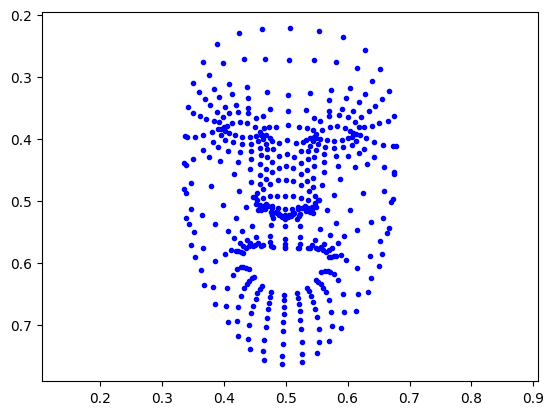

In [9]:
df = pd.read_csv('C:\\Users\\Admin\\Documents\\Caras\\Caras_2\\Feliz\\Feliz_1.csv')  # Asegúrate de poner la ruta correcta del archivo CSV

# Graficar los puntos cx y cy
plt.scatter(df['cx'], df['cy'], c='blue', marker='.')

# Invertir el eje y para que se vea como una imagen
plt.gca().invert_yaxis()

# Ajustar los ejes para que tengan la misma escala
plt.axis('equal')

# Mostrar la gráfica
plt.show()